<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

There has been a war raging since the beginning of time, Norcal vs. Socal. Some people say Norcal is infinitely better than Socal, others would disagree. While we are not going to be able to answer that question today, we are going to perhaps add some fuel to the flames. I will determine who is smarter, Norcal or Socal, by comparing the average SAT and ACT scores across all counties within both regions. 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

I determined what counties were deemed 'Norcal' by the Wikipedia article definition for [Norcal](https://en.wikipedia.org/wiki/Northern_California) and [Socal](https://en.wikipedia.org/wiki/Southern_California) counties. 

### Choose your Data


* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`california_counties.csv`](./data/california_counties.csv): List of Norcal and Socal counties, made by me

### Outside Research

I used Wikipedia to determine which counties counted as 'Norcal' and which counted as 'Socal'

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
import math
import numpy as np

# Function to calculate the mean of a list
def mean(nums):
    mean = 0
    count = 0
    for i in nums:
        mean += i
        count += 1
    return mean/count

mean([1,2,3,4,5,6])

3.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
# Function to calculate standard deviation on a list
def standard_dev(nums):
    stand_dev = 0
    n = len(nums)
    mn = mean(nums)
    for i in nums:
        stand_dev += (i - mn)**2
    return math.sqrt((1/n) * stand_dev)

standard_dev([4, 8, 6, 5, 3, 2, 8, 9, 2, 5])

2.4000000000000004

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [4]:
# Function to convert a percentage string into a float
def str_to_flt(num):
    pct = ['.']
    for i in num:
        if i != '%':
            pct.append(i)
    return float(''.join(pct))
    
str_to_flt ('01%')          

0.01

In [5]:
#Function to convert a number into a percentage

def pct_convert(num):
    if num == '*':
        return 0
    elif num == 0:
        return 0
    return float(num)/100

In [6]:
#Function to convert a string into a float 

def str_cleanup(num):
    if num == '*':
        return 0
    else:
        return float(num)

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [7]:
# Imports:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os


## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [8]:
# Importing CA ACT scores
ca_act = pd.read_csv('./data/act_2019_ca.csv')


# Parsing the data down to the only parameters we need, county and average scores
ca_act = ca_act[['CName', 'AvgScrRead', 'AvgScrEng', 'AvgScrMath', 'AvgScrSci', 'NumTstTakr']]


# Making all column names lowercase
ca_act.columns = ca_act.columns.str.lower()

# Removing NaN values
ca_act = ca_act.dropna()

# Converting all strings into floats
ca_act['avgscrread'] = ca_act['avgscrread'].map(str_cleanup)
ca_act['avgscrsci'] = ca_act['avgscrsci'].map(str_cleanup)
ca_act['avgscreng'] = ca_act['avgscreng'].map(str_cleanup)
ca_act['avgscrmath'] = ca_act['avgscrmath'].map(str_cleanup)
ca_act['numtsttakr'] = ca_act['numtsttakr'].map(str_cleanup)

# Removing rows with 0s
ca_act.drop(ca_act.index[ca_act['avgscrread'] == 0].tolist(), inplace = True)

# Exporting cleaned data
ca_act.to_csv('./data/ca_act_trim.csv')


In [9]:
#Import CA SAT scores
ca_sat = pd.read_csv('./data/sat_2019_ca.csv')

# Parsing the data down to the only parameters we need, county and average scores
ca_sat = ca_sat[['CName', 'PctBothBenchmark12', 'NumTSTTakr12']]

# Making all column names lowercase
ca_sat.columns = ca_sat.columns.str.lower()

# Changing all percents into decimals
ca_sat['pctbothbenchmark12'] = ca_sat['pctbothbenchmark12'].map(pct_convert).dropna()
ca_sat = ca_sat.dropna()

# Removing all rows with
ca_sat.drop(ca_sat.index[ca_sat['pctbothbenchmark12'] == 0].tolist(), inplace = True)

# Exporting cleaned data
ca_sat.to_csv('./data/ca_sat_trim.csv')

In [10]:
# Importing list of california counties
norcal_counties = pd.read_csv('./data/california_counties.csv')

# Removing unnecessary columns, turning it into a series
norcal_counties = norcal_counties['Norcal Counties']

# Removing nan values
norcal_counties = norcal_counties.dropna()

# Exporting norcal counties
norcal_counties.to_csv('./norcal_counties.csv')

In [11]:
# Importing list of california counties
socal_counties = pd.read_csv('./data/california_counties.csv')

# Removing unnecessary columns, turning it into a series
socal_counties = socal_counties['Socal Counties']

# Exporting norcal counties
socal_counties = socal_counties.dropna()
socal_counties.to_csv('./socal_counties.csv')

### Data Dictionary




|Feature|Type|Dataset|Description|
|---|---|---|---|
|norcal_counties|object|california_counties|These are the counties that make up Norcal| 
|socal_counties|object|california_counties|These are\ the counties that make up Socal| 
|pctbothbenchmark12|float|ca_sat_trim|This is the percentage of students that reached the minimum benchmark for the SAT in the 12th grade| 
|avgscrsci|float|ca_act_trim|This is the average Science score for ACT test takers in 2019| 
|avgscrread|float|ca_act_trim|This is the average Reading score for ACT test takers in 2019| 
|avgscrmath|float|ca_act_trim|This is the average Math score for ACT test takers in 2019| 
|avgscreng|float|ca_act_trim|This is the average English score for ACT test takers in 2019| 


## Exploratory Data Analysis


## 1. Summary Statistics

Total number of test takers:

ACT = 80,411

SAT = 167,395

Total number of tests taken by region:

ACT
Norcal = 25,356

Socal = 55,055

SAT
Norcal = 56,798

Socal = 110,597

Counties in Norcal = 48

Counties in Socal = 10

Avg ACT takers per county in Norcal = 528

Avg ACT takers per county in Socal = 5,505

Avg SAT takers per county in Norcal = 1183

Avg SAT takers per county in Socal = 11,597


## 2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.

In [13]:
# Calculating the standard deviation for each column in my data set

act_sd = {key:standard_dev(ca_act[key]) for key in ca_act if ca_act[key].dtype == 'float'}
sat_sd = {key:standard_dev(ca_sat[key]) for key in ca_sat if ca_sat[key].dtype == 'float'}

print(act_sd)
print(sat_sd)


{'avgscrread': 3.821155676292369, 'avgscreng': 4.206959118176691, 'avgscrmath': 3.4981105621185016, 'avgscrsci': 3.333547210753729, 'numtsttakr': 66.54207812149822}
{'pctbothbenchmark12': 0.23390054075702693}


## 3. Investigate trends in the data.

In [14]:
# ACT Avg score for each category in each county
sci_avg = ca_act.groupby(by = 'cname')['avgscrsci'].mean() 
read_avg = ca_act.groupby(by = 'cname')['avgscrread'].mean() 
eng_avg = ca_act.groupby(by = 'cname')['avgscreng'].mean() 
math_avg = ca_act.groupby(by = 'cname')['avgscrmath'].mean() 


# Total number of test takers by county
act_weight = ca_act.groupby(by = 'cname')['numtsttakr'].sum()

In [15]:
# Norcal ACT Stats
# Norcal score avgs
nsci_avg = sci_avg.filter(norcal_counties)
nread_avg = read_avg.filter(norcal_counties)
neng_avg = eng_avg.filter(norcal_counties)
nmath_avg = math_avg.filter(norcal_counties)

# Norcal weights
norcal_act_weight = act_weight.filter(norcal_counties)

# Norcal avgs weighted
nsci_a_w = nsci_avg * norcal_act_weight
nread_a_w = nread_avg * norcal_act_weight
neng_a_w = neng_avg * norcal_act_weight
nmath_a_w = nmath_avg * norcal_act_weight

# Weighted norcal avgs
nsci_wavg = nsci_a_w.sum()/norcal_act_weight.sum()
nread_wavg = nread_a_w.sum()/norcal_act_weight.sum()
neng_wavg = neng_a_w.sum()/norcal_act_weight.sum()
nmath_wavg = nmath_a_w.sum()/norcal_act_weight.sum()

print(round(nsci_wavg, 3))
print(round(nread_wavg, 3))
print(round(neng_wavg, 3))
print(round(nmath_wavg, 3))

nscores = [21.976, 22.745, 21.921, 22.112]

21.976
22.745
21.921
22.112


In [16]:
# Socal ACT Stats
# Socal score avgs
ssci_avg = sci_avg.filter(socal_counties)
sread_avg = read_avg.filter(socal_counties)
seng_avg = eng_avg.filter(socal_counties)
smath_avg = math_avg.filter(socal_counties)

# Norcal weights
socal_act_weight = act_weight.filter(socal_counties)

# Norcal avgs weighted
ssci_a_w = ssci_avg * socal_act_weight
sread_a_w = sread_avg * socal_act_weight
seng_a_w = seng_avg * socal_act_weight
smath_a_w = smath_avg * socal_act_weight

# Weighted norcal avgs
ssci_wavg = ssci_a_w.sum()/socal_act_weight.sum()
sread_wavg = sread_a_w.sum()/socal_act_weight.sum()
seng_wavg = seng_a_w.sum()/socal_act_weight.sum()
smath_wavg = smath_a_w.sum()/socal_act_weight.sum()

print(round(ssci_wavg, 3))
print(round(sread_wavg, 3))
print(round(seng_wavg, 3))
print(round(smath_wavg, 3))

sscores = [20.902, 21.504, 20.716, 20.979]

20.902
21.504
20.716
20.979


As we can see, across the board Norcal tends to avg 1 point higher on all categories in the ACT. Norcal smarter?

In [17]:
# SAT avg benchmark rate
sat_avg = ca_sat.groupby(by = 'cname')['pctbothbenchmark12'].mean()

# Total number of test takers by count
sat_weight = ca_sat.groupby(by = 'cname')['numtsttakr12'].sum()

# Weighted scores
sat_weighted = sat_weight * sat_avg

In [18]:
# Norcal stats
# Norcal avgs
nsat_avg = sat_avg.filter(norcal_counties)

# Norcal weights
norcal_sat_weight = sat_weight.filter(norcal_counties) 

# Norcal avg weighted
nsat_avg_weighted = nsat_avg * norcal_sat_weight

# Norcal weighted avg
nsat_wavg = nsat_avg_weighted.sum()/norcal_sat_weight.sum()
round(nsat_wavg, 3)


0.468

In [19]:
# Socal stats
# Socal avgs
ssat_avg = sat_avg.filter(socal_counties)

# Norcal weights
socal_sat_weight = sat_weight.filter(socal_counties) 

# Norcal avg weighted
ssat_avg_weighted = ssat_avg * socal_sat_weight

# Norcal weighted avg
ssat_wavg = ssat_avg_weighted.sum()/socal_sat_weight.sum()
round(ssat_wavg, 3)


0.394

We get a similar result here with the SAT. Norcal has a 6.7% higher benchmark rate than Socal.

## Visualize the Data


In [21]:
# Correlation on the ACT dataset
ca_act.corr()

,avgscrread,avgscreng,avgscrmath,avgscrsci,numtsttakr
avgscrread,1.000000,0.978184,0.948091,0.969036,0.185166
avgscreng,0.978184,1.000000,0.955541,0.971232,0.205431
avgscrmath,0.948091,0.955541,1.000000,0.968691,0.255908
avgscrsci,0.969036,0.971232,0.968691,1.000000,0.224892
numtsttakr,0.185166,0.205431,0.255908,0.224892,1.000000


Text(0.5, 1.0, 'Avg Reading Score Histogram')

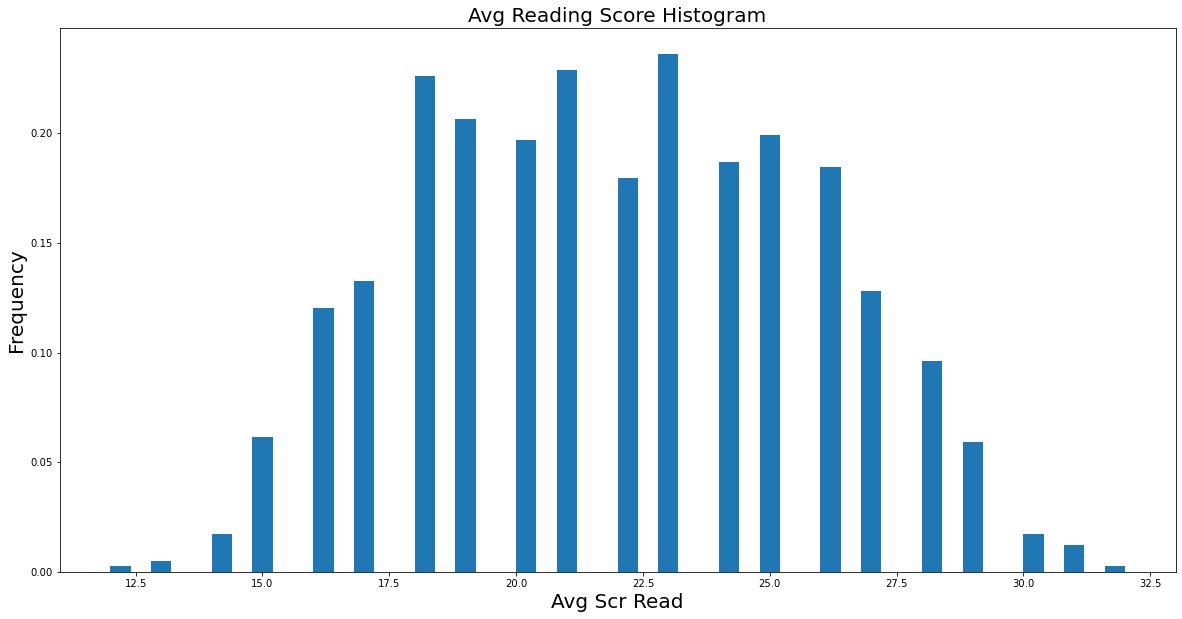

In [22]:
plt.figure(figsize = (20, 10))
plt.hist(ca_act['avgscrread'], bins = 50, density= True);
plt.xlabel('Avg Scr Read', size = 20)
plt.ylabel('Frequency', size = 20)
plt.title('Avg Reading Score Histogram', size = 20)

Text(0.5, 1.0, 'Passed both Benchmarks G12 Histogram')

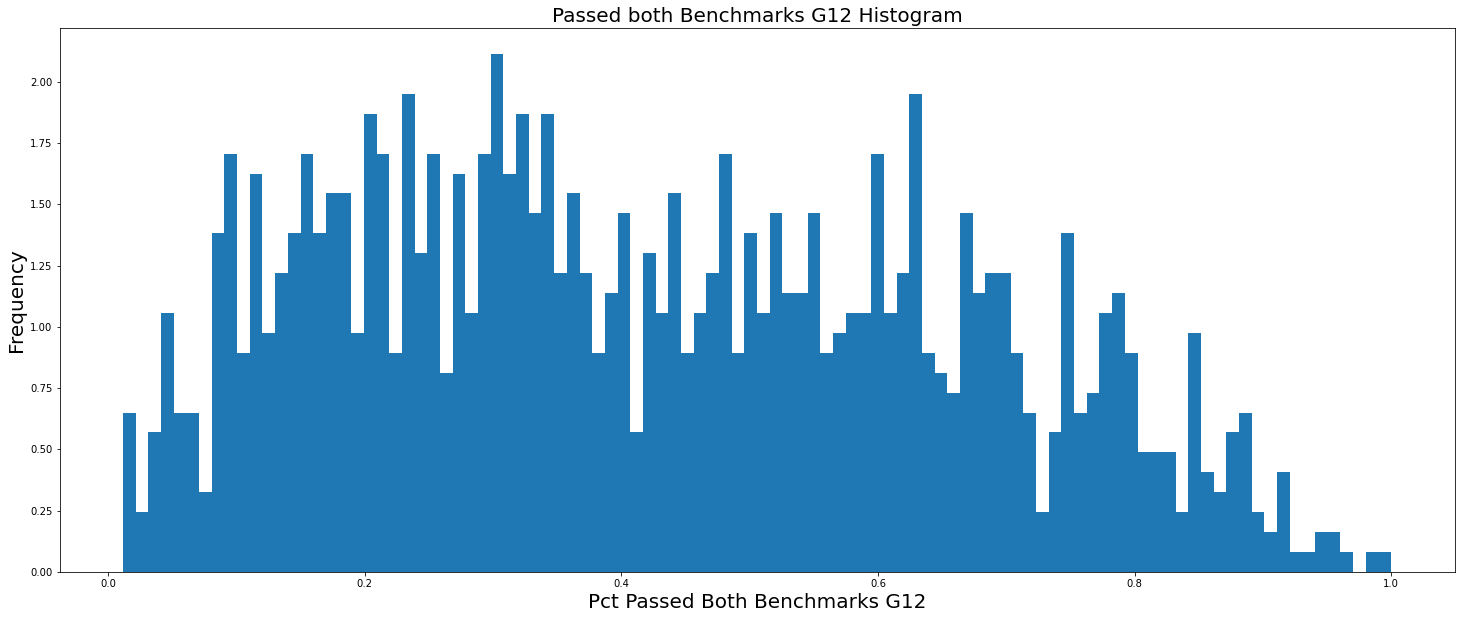

In [23]:
plt.figure(figsize = (25, 10))
plt.hist(ca_sat['pctbothbenchmark12'], bins = 100, density = True);
plt.xlabel('Pct Passed Both Benchmarks G12', size = 20)
plt.ylabel('Frequency', size = 20)
plt.title('Passed both Benchmarks G12 Histogram', size = 20)

3     23.0
4     22.0
5     16.0
6     17.0
13    25.0
16    27.0
18    15.0
19    18.0
20    22.0
21    24.0
22    24.0
23    15.0
25    26.0
27    26.0
29    21.0
30    23.0
31    23.0
32    18.0
33    26.0
34    18.0
Name: avgscrsci, dtype: float64

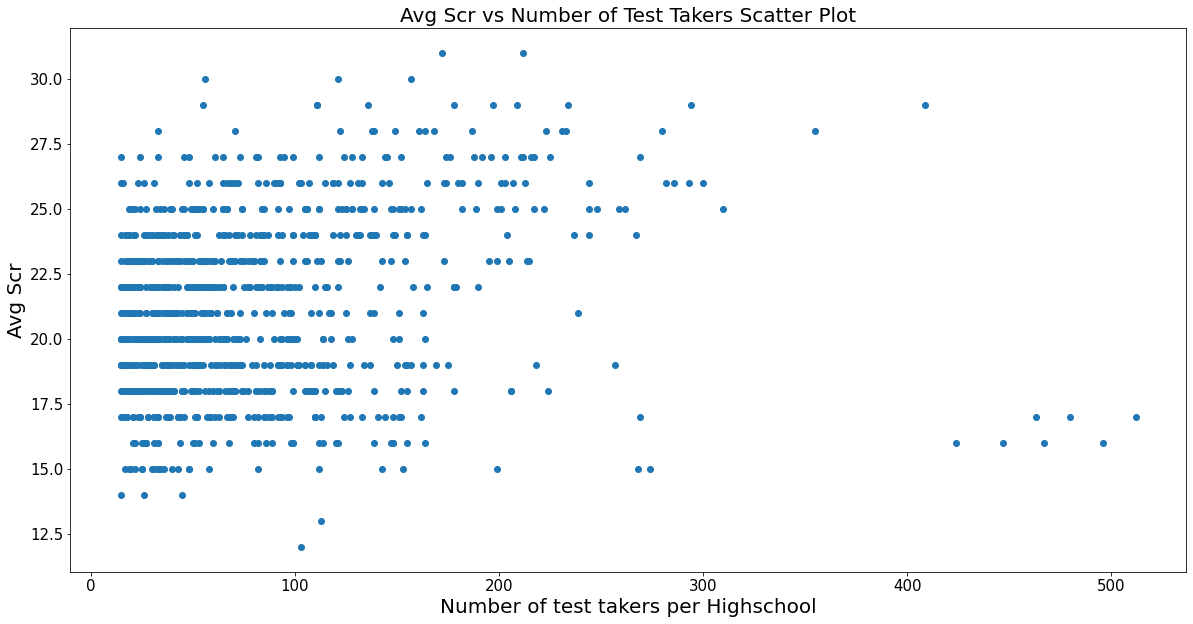

In [45]:
plt.figure(figsize = (20, 10))
plt.scatter(ca_act['numtsttakr'], ca_act['avgscrsci']);
plt.xlabel('Number of test takers per Highschool', size = 20)
plt.ylabel('Avg Scr', size = 20)
plt.title('Avg Scr vs Number of Test Takers Scatter Plot', size = 20)
ca_act['avgscrsci'].head(20)

Text(0, 0.5, 'Pass Rate')

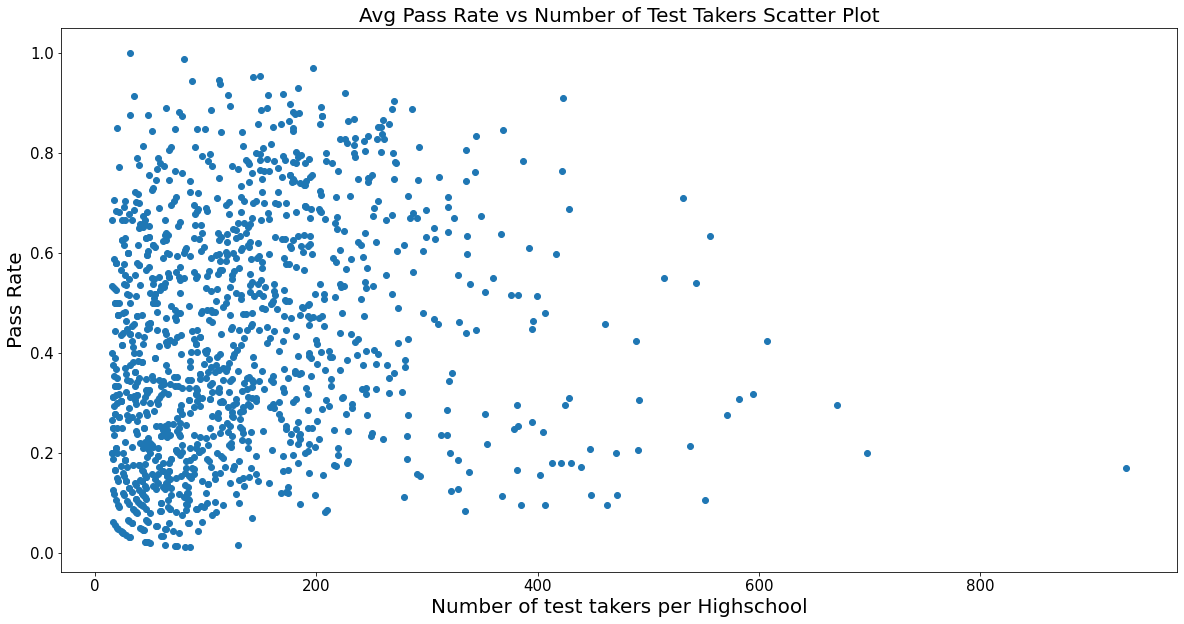

In [42]:
plt.figure(figsize = (20, 10))
plt.scatter(ca_sat['numtsttakr12'], ca_sat['pctbothbenchmark12']);
plt.title('Avg Pass Rate vs Number of Test Takers Scatter Plot', size = 20)
plt.xlabel('Number of test takers per Highschool', size = 20)
plt.ylabel('Pass Rate', size = 20)

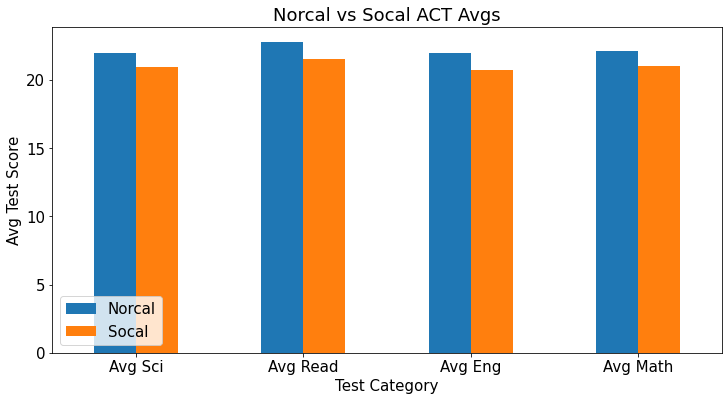

In [26]:

plt.rcParams.update({'font.size': 15})
nscores = [21.976, 22.745, 21.921, 22.112]
sscores = [20.902, 21.504, 20.716, 20.979]
index = ['Avg Sci', 'Avg Read', 'Avg Eng', 'Avg Math']
df = pd.DataFrame({'Norcal': nscores,
                   'Socal': sscores}, index=index)
df.plot.bar(rot=0, figsize = (12, 6), xlabel = 'Test Category',ylabel = 'Avg Test Score', title = 'Norcal vs Socal ACT Avgs')
plt.legend(loc='lower left');

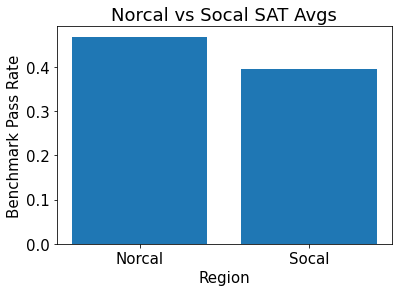

In [27]:
scores = [0.468, .394]
labels = ['Norcal', 'Socal']
plt.bar(labels, scores)
plt.xlabel('Region')
plt.ylabel('Benchmark Pass Rate')
plt.title('Norcal vs Socal SAT Avgs');

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

I think the biggest takeaway is that Norcal is actually smarter than Socal. It is interesting to note the much smaller population size of Norcal, almost half that of Socal. It is also important to note the difference in population structures across regions. Norcal has 37 counties while Socal only has 10, indication a population that is much more spread out. This makes sense when considering the geography of the regions. 